# 課題0710

そのまま課題ファイルで編集しないでください。課題ファイルを複製してから課題を回答してください。

In [14]:
import pandas as pd
df=pd.read_csv("https://raw.githubusercontent.com/lvzeyu/css_tohoku/master/css_tohoku/draft/Data/titanic.csv")

In [7]:
df.head(50)

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,1.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0
3,1.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",0
4,1.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0
5,1.0,"Anderson, Mr. Harry",male,48.0000,0.0,0.0,19952,26.5500,E12,S,3,NaN,"New York, NY",1
6,1.0,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1.0,0.0,13502,77.9583,D7,S,10,NaN,"Hudson, NY",1
7,1.0,"Andrews, Mr. Thomas Jr",male,39.0000,0.0,0.0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI",0
8,1.0,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2.0,0.0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY",1
9,1.0,"Artagaveytia, Mr. Ramon",male,71.0000,0.0,0.0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay",0


## 課題1

以下の図を再現してください

- 年齢の分布を、異なる階級幅を使って、4つのサブプロットをわけて描画する
   - 階級幅を適当で決めてよい
- 各サブプロットには、
    - x軸ラベル、y軸ラベル、サブプロット番号(a-d)を指定する
    - 水平方向のグリッド線を追加する
    - ヒストグラムの色を`lightblue`に変更する

![](./Figure1.png)

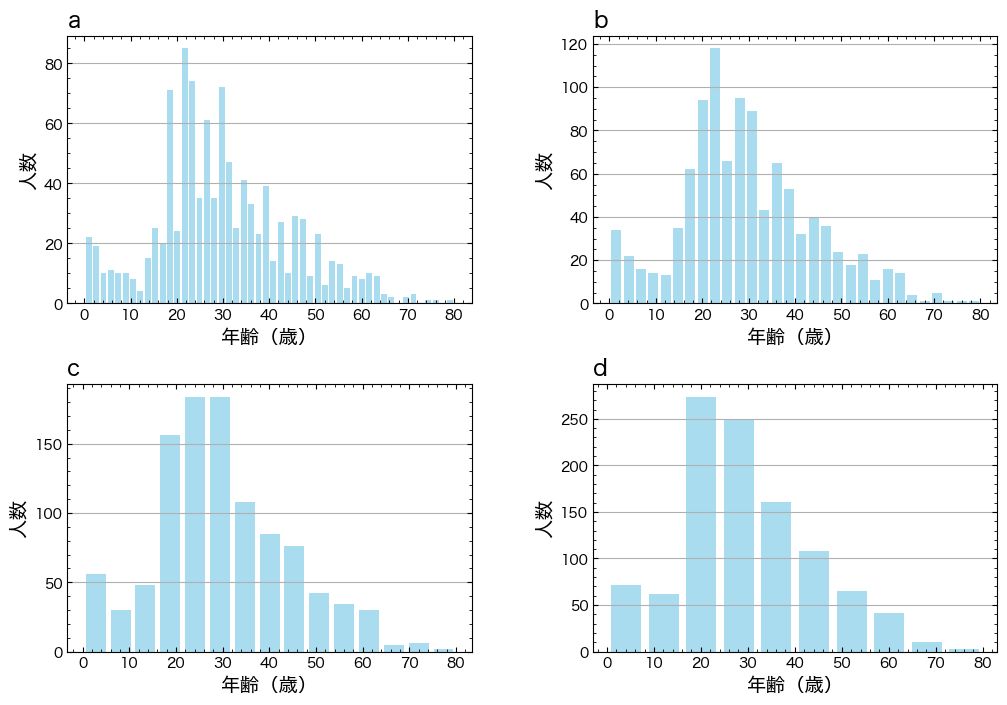

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

plt.rcParams['font.family'] = 'Hiragino Sans'

fig, axs = plt.subplots(2, 2, figsize=(12, 8))

parameters = [(50, 'a', range(0, 81, 20)), 
              (30, 'b', range(0, 121, 20)), 
              (15, 'c', range(0, 151, 50)), 
              (10, 'd', range(0, 251, 50))]

for i, (bins, title, yticks) in enumerate(parameters):
    row = i // 2  
    col = i % 2   

    ax = axs[row, col]
    ax.hist(df['age'], bins=bins, rwidth=0.8, color='skyblue', alpha=0.7)
    ax.set_xlabel('年齢（歳）', fontsize=14)
    ax.set_ylabel('人数', fontsize=14)
    ax.set_title(title, fontsize=16, loc='left')
    ax.xaxis.set_ticks_position('both')
    ax.yaxis.set_ticks_position('both')
    ax.grid(axis='y')
    
    ax.set_yticks(yticks)
    
    ax.minorticks_on()
    ax.tick_params(direction='in', which='both')

fig.subplots_adjust(wspace=0.3, hspace=0.3)

plt.show()


## 課題2

以下の図を再現してください

- 男性乗客と女性乗客の年齢の分布をそれぞれ描画する
- 全乗客の年齢分布を示す灰色ヒストグラムも描画する
- 図のタイトル、x軸ラベル、y軸ラベル、凡例を設定する

![](./Figure2.png)

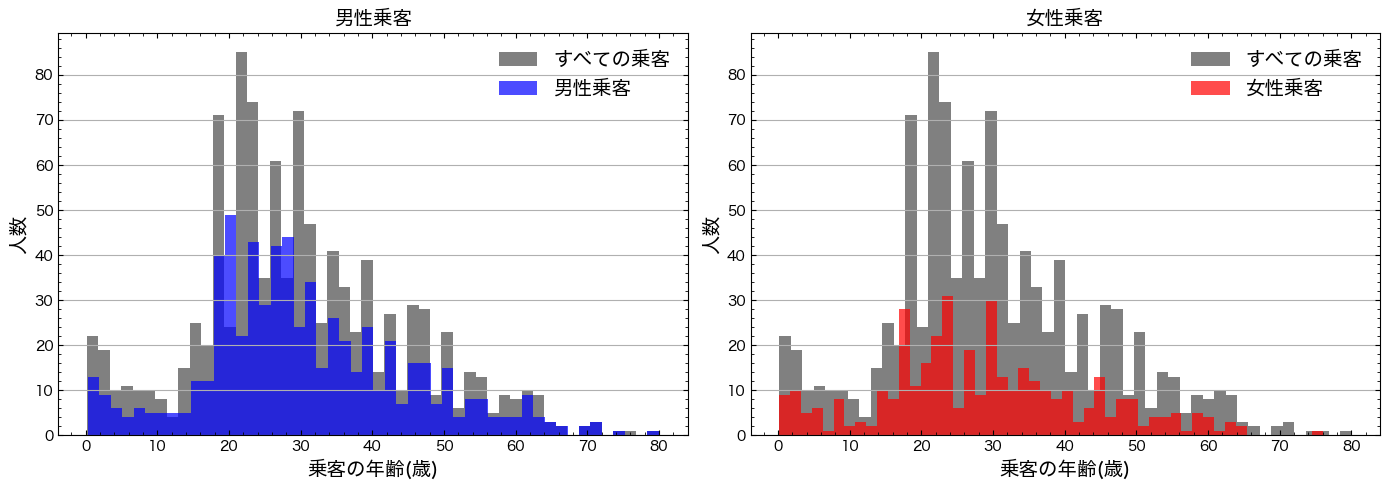

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = df.dropna(subset=['age'])

male_ages = df[df['sex'] == 'male']['age']
female_ages = df[df['sex'] == 'female']['age']
all_ages = df['age']

parameters = [('男性乗客', male_ages, 'blue', '男性乗客'), 
              ('女性乗客', female_ages, 'red', '女性乗客')]

fig, axs = plt.subplots(1, 2, figsize=(14, 5))

for i, (title, ages, color, label) in enumerate(parameters):
    axs[i].hist(all_ages, bins=50, color='gray', label='すべての乗客')
    axs[i].hist(ages, bins=50, color=color, alpha=0.7, label=label)
    axs[i].set_title(title, fontsize=14)
    axs[i].set_xlabel('乗客の年齢(歳)', fontsize=14)
    axs[i].set_ylabel('人数', fontsize=14)
    axs[i].xaxis.set_ticks_position('both')
    axs[i].yaxis.set_ticks_position('both')
    axs[i].grid(axis='y')
    axs[i].minorticks_on()
    axs[i].tick_params(direction='in', which='both')
    axs[i].legend(fontsize=14, frameon=False)

plt.tight_layout()
plt.show()
